In [6]:
import requests
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import matplotlib.dates as mdate

In [7]:
sns.set_style("whitegrid")

API_KEY = "19fe6d90e7facf17212f8baf9d877077"
CITY = 'Delhi'
URL = f'http://api.openweathermap.org/data/2.5/forecast?q={CITY}&appid={API_KEY}&units=metric'

res = requests.get(URL)
raw = res.json()

In [10]:
weather = []
for item in raw['list']:
    weather.append({
        'datetime': item['dt_txt'],
        'temperature': item['main']['temp'],
        'humidity': item['main']['humidity'],
        'wind_speed': item['wind']['speed']
    })

df = pd.DataFrame(weather)
df['datetime'] = pd.to_datetime(df['datetime'])
print(df.head())
print(data)

             datetime  temperature  humidity  wind_speed
0 2025-07-15 12:00:00        30.51        51        6.25
1 2025-07-15 15:00:00        29.54        52        5.05
2 2025-07-15 18:00:00        28.22        53        4.15
3 2025-07-15 21:00:00        29.21        57        3.34
4 2025-07-16 00:00:00        26.48        59        2.83
{'cod': '200', 'message': 0, 'cnt': 40, 'list': [{'dt': 1752580800, 'main': {'temp': 30.51, 'feels_like': 32.01, 'temp_min': 30.51, 'temp_max': 30.51, 'pressure': 997, 'sea_level': 997, 'grnd_level': 972, 'humidity': 51, 'temp_kf': 0}, 'weather': [{'id': 803, 'main': 'Clouds', 'description': 'broken clouds', 'icon': '04d'}], 'clouds': {'all': 77}, 'wind': {'speed': 6.25, 'deg': 177, 'gust': 8.33}, 'visibility': 10000, 'pop': 0, 'sys': {'pod': 'd'}, 'dt_txt': '2025-07-15 12:00:00'}, {'dt': 1752591600, 'main': {'temp': 29.54, 'feels_like': 30.68, 'temp_min': 27.61, 'temp_max': 29.54, 'pressure': 997, 'sea_level': 997, 'grnd_level': 973, 'humidity': 52,

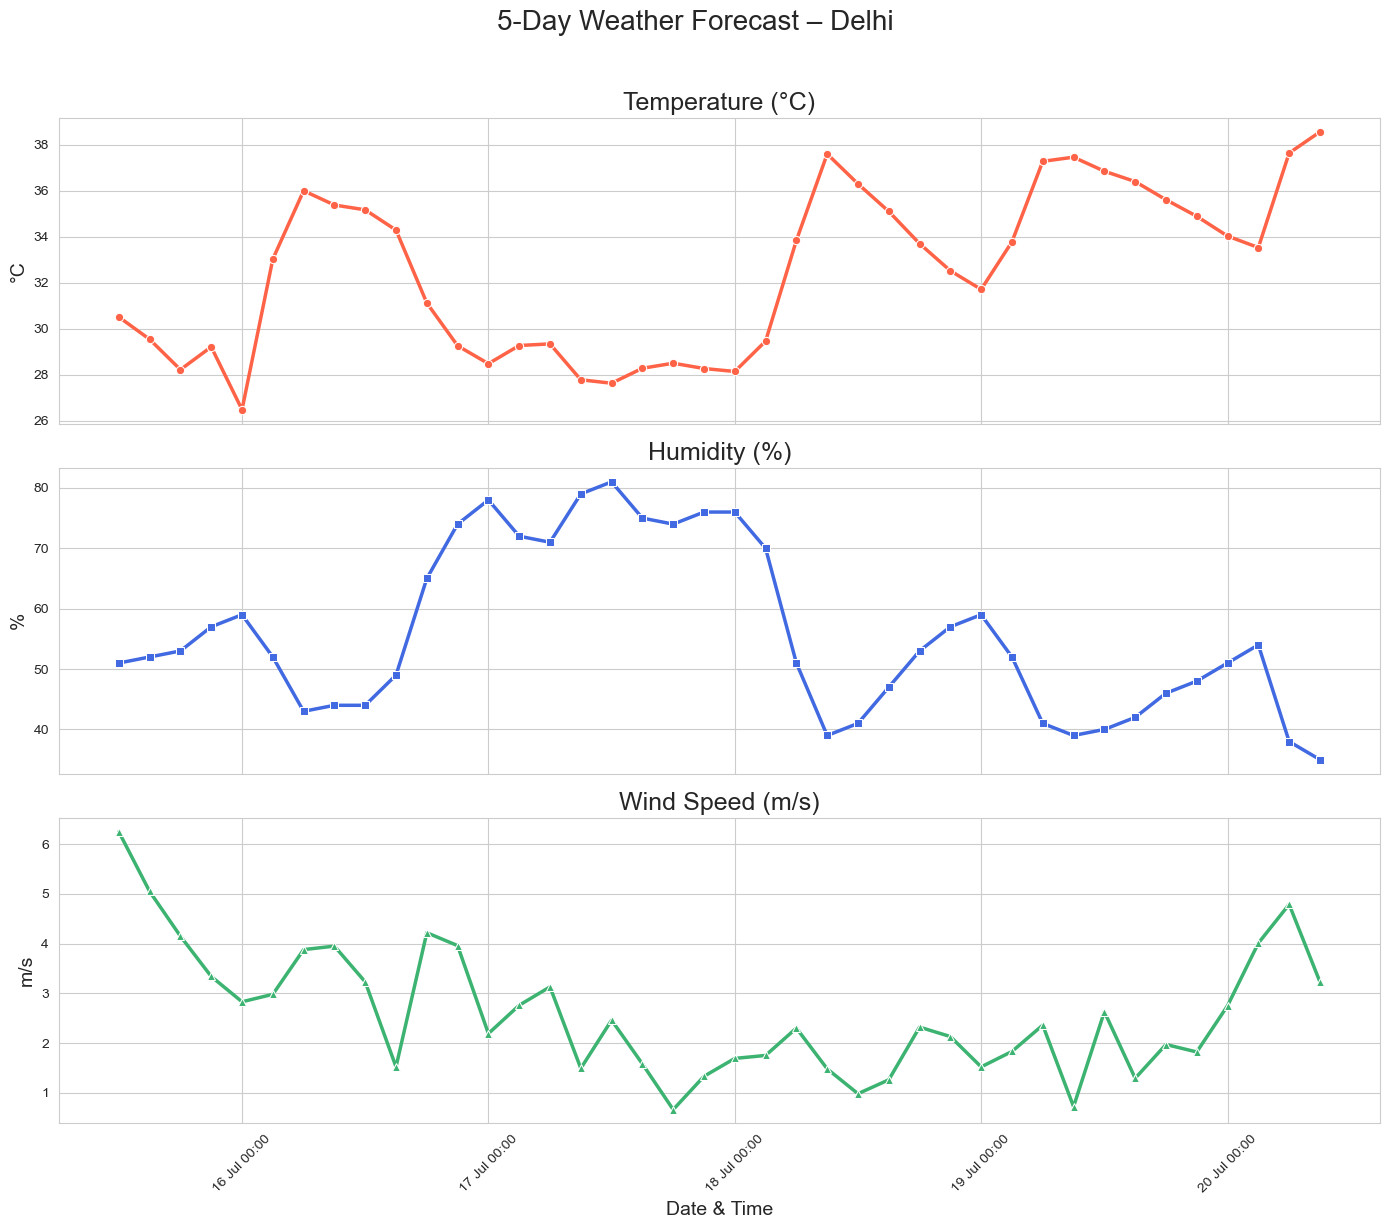

In [15]:
plt.rcParams['figure.figsize'] = (14, 8)
plt.rcParams['axes.titlesize'] = 18
plt.rcParams['axes.labelsize'] = 14

fig, ax = plt.subplots(3, 1, figsize=(14, 12), sharex=True)

sns.lineplot(data=df, x='datetime', y='temperature', ax=ax[0], marker='o', color='tomato', linewidth=2.5)
ax[0].set_title('Temperature (°C)')
ax[0].set_ylabel('°C')

sns.lineplot(data=df, x='datetime', y='humidity', ax=ax[1], marker='s', color='royalblue', linewidth=2.5)
ax[1].set_title('Humidity (%)')
ax[1].set_ylabel('%')

sns.lineplot(data=df, x='datetime', y='wind_speed', ax=ax[2], marker='^', color='mediumseagreen', linewidth=2.5)
ax[2].set_title('Wind Speed (m/s)')
ax[2].set_ylabel('m/s')
ax[2].set_xlabel('Date & Time')

ax[2].xaxis.set_major_formatter(mdates.DateFormatter('%d %b %H:%M'))
plt.xticks(rotation=45)

plt.tight_layout()
plt.suptitle(f"5-Day Weather Forecast – {CITY}", fontsize=20, y=1.02)
plt.subplots_adjust(top=0.93)

plt.show()
